# Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import nltk
import tensorflow
import keras
import re
import string
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

# Read the dataset

In [3]:
df1=pd.read_csv(r"F:\SimpliLearn NLP3\Text Summarization\news_summary.csv\news_summary.csv",encoding='latin1')
df1.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [4]:
df2=pd.read_csv(r"F:\SimpliLearn NLP3\Text Summarization\news_summary_more.csv\news_summary_more.csv")
df2.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
data=pd.concat([df1,df2],axis=0)
data.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


# Information about dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102915 entries, 0 to 98400
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   author     4514 non-null    object
 1   date       4514 non-null    object
 2   headlines  102915 non-null  object
 3   read_more  4514 non-null    object
 4   text       102915 non-null  object
 5   ctext      4396 non-null    object
dtypes: object(6)
memory usage: 5.5+ MB


In [7]:
data.duplicated(subset=['text'])

0        False
1        False
2        False
3        False
4        False
         ...  
98396    False
98397    False
98398    False
98399    False
98400    False
Length: 102915, dtype: bool

In [8]:
# Drop Duplicates 
data.drop_duplicates(subset=['text'],inplace=True)

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import bs4
from bs4 import BeautifulSoup

In [11]:
data['text'].values

array(['The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.',
       'Malaika Arora slammed an Instagram user who trolled her for "divorcing a rich man" and "having fun with the alimony". "Her life now is all about wearing short clothes, going to gym or salon, enjoying vacation[s]," the user commented. Malaika responded, "You certainly got to get your damn facts right before spewing sh*t on me...when you know nothing about me."',
       "The Indira Gandhi Institute of Medical Sciences (IGIMS) in Patna on Thursday made corrections in its Marital Declaration Form by changing 'Virgin' option to 'Unmarried'. Earlier, Bihar Health Minister defined virgin as being an unmarried woman and did

We will perform the below preprocessing tasks for our data:

1.Convert everything to lowercase

2.Remove HTML tags

3.Contraction mapping

4.Remove (‘s)

5.Remove any text inside the parenthesis ( )

6.Eliminate punctuations and special characters

7.Remove stopwords

8.Remove short words

Let’s define the function:

In [12]:
def clean_text(text,num):
    newString=text.lower()
    newString=BeautifulSoup(newString,'lxml').text
    newString=' '.join(contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(' '))
    newString=re.sub(r'\([^)]*\)','',newString)
    newString=re.sub(r'\[.*?\]','',newString)
    newString=re.sub(r"'s\b",'',newString)
    newString=re.sub(r'\w*\d\w*','',newString)
    newString=re.sub(r'[^a-zA-Z]',' ',newString)
    newString=re.sub(r'[m]{2,}','mm',newString)
    if(num==0):
        tokens=[w for w in newString.split() if w not in STOPWORDS]
    else:
        tokens=newString.split()
    longWords=[]
    for i in tokens:
        if len(i)>1:
            longWords.append(i)
    return (' '.join(longWords)).strip()

In [13]:
#call the function
cleaned_text=[]
for i in data['text']:
    cleaned_text.append(clean_text(i,0))

In [14]:
cleaned_headlines=[]
for i in data['headlines']:
    cleaned_headlines.append(clean_text(i,1))

In [15]:
data['Clean_Text']=cleaned_text
data['Clean_Headlines']=cleaned_headlines

In [16]:
for (index,text) in enumerate(data['Clean_Text'].values[:10]):
    print((index+1),text)

1 administration union territory daman diu revoked order made compulsory women tie rakhis male colleagues occasion rakshabandhan august administration forced withdraw decision within hours issuing circular received flak employees slammed social media
2 malaika arora slammed instagram user trolled divorcing rich man fun alimony life wearing short clothes going gym salon enjoying vacation user commented malaika responded certainly got get damn facts right spewing sh know nothing
3 indira gandhi institute medical sciences patna thursday made corrections marital declaration form changing virgin option unmarried earlier bihar health minister defined virgin unmarried woman consider term objectionable institute however faced strong backlash asking new recruits declare virginity form
4 lashkar taiba kashmir commander abu dujana killed security forces said kabhi hum aage kabhi aap aaj aapne pakad liya mubarak ho aapko caught added surrender whatever fate happen hum nikley shaheed hone added
5 h

In [17]:
for (index,headlines) in enumerate(data['Clean_Headlines'].values[:10]):
    print((index+1),headlines)

1 daman diu revokes mandatory rakshabandhan in offices order
2 malaika slams user who trolled her for divorcing rich man
3 virgin now corrected to unmarried in igims form
4 aaj aapne pakad liya let man dujana before being killed
5 hotel staff to get training to spot signs of sex trafficking
6 man found dead at delhi police station kin allege foul play
7 delhi hc reduces aid for negligent accident victim by
8 yr old lynched over rumours she was cutting people hair
9 chopper flying critically low led to bombay high crash
10 congress opens state bank of tomato in lucknow


# Understanding the distribution of the sequences

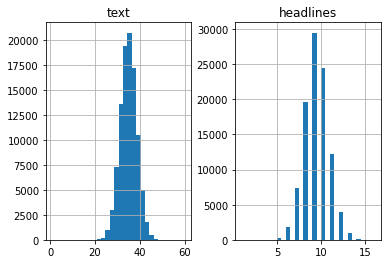

In [18]:
text_word_count=[]
headlines_word_count=[]

for i in data['Clean_Text']:
    text_word_count.append(len(i.split()))

for i in data['Clean_Headlines']:
    headlines_word_count.append(len(i.split()))

length_df=pd.DataFrame({'text':text_word_count,'headlines':headlines_word_count})

length_df.hist(bins=30)
plt.show()

Interesting. We can fix the maximum length of the headlines to 14 since that seems to be the majority headlines length.

Let us understand the proportion of the length of headlines below 14

In [19]:
cnt=0
for i in data['Clean_Headlines']:
    if (len(i.split())<=14):
        cnt+=1

print(cnt/len(data['Clean_Headlines']))

0.9998004529717541


We observe that 99% of the headlines have length below 14. So, we can fix maximum length of headlines to 14.

Let us fix the maximum length of text to 53

In [21]:
cnt=0
for i in data['Clean_Text']:
    if (len(i.split())<=53):
        cnt+=1

print(cnt/len(data['Clean_Text']))

0.9999700679457632


In [22]:
max_text_len=53
max_headlines_len=14

Let us select the reviews and summaries whose length falls below or equal to max_text_len and max_headlines_len

In [23]:
cleaned_text=np.array(data['Clean_Text'])
cleaned_headlines=np.array(data['Clean_Headlines'])

short_text=[]
short_headlines=[]

for i in range(len(cleaned_text)):
    if (len(cleaned_headlines[i].split())<=max_headlines_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_headlines.append(cleaned_headlines[i])

df=pd.DataFrame({'text':short_text,'headlines':short_headlines})
df.head()

,text,headlines
0,administration union territory daman diu revok...,daman diu revokes mandatory rakshabandhan in o...
1,malaika arora slammed instagram user trolled d...,malaika slams user who trolled her for divorci...
2,indira gandhi institute medical sciences patna...,virgin now corrected to unmarried in igims form
3,lashkar taiba kashmir commander abu dujana kil...,aaj aapne pakad liya let man dujana before bei...
4,hotels maharashtra train staff spot signs sex ...,hotel staff to get training to spot signs of s...


Remember to add the START and END special tokens at the beginning and end of the summary. Here, I have chosen startseq and endseq as START and END tokens

In [64]:
df['headlines']=df['headlines'].apply(lambda x: 'startseq '+ x +' endseq')
df.head()

,text,headlines
0,administration union territory daman diu revok...,startseq daman diu revokes mandatory rakshaban...
1,malaika arora slammed instagram user trolled d...,startseq malaika slams user who trolled her fo...
2,indira gandhi institute medical sciences patna...,startseq virgin now corrected to unmarried in ...
3,lashkar taiba kashmir commander abu dujana kil...,startseq aaj aapne pakad liya let man dujana b...
4,hotels maharashtra train staff spot signs sex ...,startseq hotel staff to get training to spot s...


In [65]:
df['headlines'].values

array(['startseq daman diu revokes mandatory rakshabandhan in offices order endseq',
       'startseq malaika slams user who trolled her for divorcing rich man endseq',
       'startseq virgin now corrected to unmarried in igims form endseq',
       ..., 'startseq the matrix film to get reboot reports endseq',
       'startseq snoop dogg aims gun at clown dressed as trump in new video endseq',
       'startseq madhesi morcha withdraws support to nepalese government endseq'],
      dtype=object)

In [66]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(np.array(df['text']),np.array(df['headlines']),test_size=0.1,random_state=0,shuffle=True)

# Prepare The Tokenizer

A tokenizer builds the vocabulary and converts a word sequence to an integer sequence. Go ahead and build tokenizers for text and summary:

In [67]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
X_tokenizer=Tokenizer()
X_tokenizer.fit_on_texts(list(trainX))

# Rarewords and its Coverage
Let us look at the proportion rare words and its total coverage in the entire text

Here, I am defining the threshold to be 4 which means word whose count is below 4 is considered as a rare word

In [69]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in X_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print('% of rare words in the vocabulary:',(cnt/tot_cnt)*100)
print('Total coverage of rare words:',(freq/tot_freq)*100)

% of rare words in the vocabulary: 57.06656833019203
Total coverage of rare words: 1.9936205409084793


Remember:

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives me the no. of rare words whose count falls below threshold

tot_cnt - cnt gives me the top most common words

Let us define the tokenizer with top most common words for reviews.

In [70]:
X_tokenizer=Tokenizer(num_words=tot_cnt-cnt)
X_tokenizer.fit_on_texts(list(trainX))

trainX_seq=X_tokenizer.texts_to_sequences(trainX)
testX_seq=X_tokenizer.texts_to_sequences(testX)

trainX=pad_sequences(trainX_seq,maxlen=max_text_len,padding='post')
testX=pad_sequences(testX_seq,maxlen=max_text_len,padding='post')

X_voc=len(X_tokenizer.word_index)+1
X_voc

73219

# Headlines Tokenizer

In [71]:
Y_tokenizer=Tokenizer()
Y_tokenizer.fit_on_texts(list(trainY))

# Rarewords and its Coverage

Let us look at the proportion rare words and its total coverage in the entire summary

Here, I am defining the threshold to be 6 which means word whose count is below 6 is considered as a rare word

In [72]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in Y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print('% of rare words in the vocabulary:',(cnt/tot_cnt)*100)
print('Total coverage of rare words:',(freq/tot_freq)*100)

% of rare words in the vocabulary: 64.48886205472051
Total coverage of rare words: 3.845948969264369


In [73]:
Y_tokenizer=Tokenizer(num_words=tot_cnt-cnt)
Y_tokenizer.fit_on_texts(list(trainY))

trainY_seq=Y_tokenizer.texts_to_sequences(trainY)
testY_seq=Y_tokenizer.texts_to_sequences(testY)

trainY=pad_sequences(trainY_seq,maxlen=max_headlines_len,padding='post')
testY=pad_sequences(testY_seq,maxlen=max_headlines_len,padding='post')

Y_voc=len(Y_tokenizer.word_index)+1
Y_voc

31470

In [74]:
Y_tokenizer.word_counts['startseq'],len(trainY)

(90183, 90183)


Here, I am deleting the rows that contain only START and END tokens

In [75]:
ind=[]
for i in range(len(trainY)):
    cnt=0
    for j in trainY[i]:
        if j!=0:
            cnt=cnt+1
    if (cnt==2):
        ind.append(i)

trainY=np.delete(trainY,ind,axis=0)
trainX=np.delete(trainX,ind,axis=0)

In [76]:
ind=[]
for i in range(len(testY)):
  cnt=0
  for j in testY[i]:
    if j!=0:
      cnt=cnt+1
  if(cnt==2):
    ind.append(i)

testY=np.delete(testY,ind,axis=0)
testX=np.delete(testX,ind,axis=0)

In [77]:
import tensorflow as tf
from keras import backend as K
K.clear_session()
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional,LSTM,Embedding,Concatenate,TimeDistributed,Input,Dense,Layer


In [78]:
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

# Model building
We are finally at the model building part. But before we do that, we need to familiarize ourselves with a few terms which are required prior to building the model.

Return Sequences = True: When the return sequences parameter is set to True, LSTM produces the hidden state and cell state for every timestep

Return State = True: When return state = True, LSTM produces the hidden state and cell state of the last timestep only

Initial State: This is used to initialize the internal states of the LSTM for the first timestep

Stacked LSTM: Stacked LSTM has multiple layers of LSTM stacked on top of each other. This leads to a better representation of the sequence. I encourage you to experiment with the multiple layers of the LSTM stacked on top of each other (it’s a great way to learn this)

Here, we are building a 3 stacked LSTM for the encoder:

In [79]:
latent_dims=500
embedding_dims=300
#Encoder
encoder_inputs=Input(shape=(max_text_len,))
#Embedding Layer
enc_emb=Embedding(X_voc,embedding_dims,trainable=True)(encoder_inputs)
#Encoder LSTM1
encoder_lstm1=LSTM(latent_dims,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1,state_h1,state_c1=encoder_lstm1(enc_emb)
#Encoder LSTM2
encoder_lstm2=LSTM(latent_dims,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2,state_h2,state_c2=encoder_lstm2(encoder_output1)
#Encoder LSTM3
encoder_lstm3=LSTM(latent_dims,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output,state_h,state_c=encoder_lstm3(encoder_output2)
#Decoder
decoder_inputs=Input(shape=(None,))
#Embedding Layer
dec_emb=Embedding(Y_voc,embedding_dims,trainable=True)
dec_emb_layer=dec_emb(decoder_inputs)
#Decoder LSTM
decoder_lstm=LSTM(latent_dims,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state,decoder_bwd_state=decoder_lstm(dec_emb_layer,initial_state=[state_h,state_c])

#Attention Layer
attention=AttentionLayer(name='Attention')
attn_out,attn_states=attention([encoder_output,decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input=Concatenate(axis=-1)([decoder_outputs,attn_out])
#Dense Layer
decoder_dense=TimeDistributed(Dense(Y_voc,activation='softmax'))
decoder_outputs=decoder_dense(decoder_concat_input)
#Define the Model
model=Model(inputs=[encoder_inputs,decoder_inputs],outputs=decoder_outputs)

model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 53)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 53, 300)      21965700    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 53, 500),    1602000     ['embedding[0][0]']              
                                 (None, 500),                                                     
                                 (None, 500)]                                                     
                                                                                              

In [80]:
#I am using sparse categorical cross-entropy as the loss function since it converts the integer sequence to a one-hot vector on the fly. This overcomes any memory issues.
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy')

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)

In [82]:
H=model.fit([trainX,trainY[:,:-1]],trainY.reshape(trainY.shape[0],trainY.shape[1],1)[:,1:],epochs=45,batch_size=512,callbacks=[es],validation_data=([testX,testY[:,:-1]],testY.reshape(testY.shape[0],testY.shape[1],1)[:,1:]))

Epoch 1/45
177/177 [==============================] - 350s 2s/step - loss: 5.8804 - val_loss: 5.4192
Epoch 2/45
177/177 [==============================] - 322s 2s/step - loss: 5.3192 - val_loss: 5.2938
Epoch 3/45
177/177 [==============================] - 317s 2s/step - loss: 5.2719 - val_loss: 5.2424
Epoch 4/45
177/177 [==============================] - 314s 2s/step - loss: 5.2258 - val_loss: 5.1974
Epoch 5/45
177/177 [==============================] - 315s 2s/step - loss: 5.1805 - val_loss: 5.1588
Epoch 6/45
177/177 [==============================] - 311s 2s/step - loss: 5.1429 - val_loss: 5.1210
Epoch 7/45
177/177 [==============================] - 312s 2s/step - loss: 5.1089 - val_loss: 5.0933
Epoch 8/45
177/177 [==============================] - 312s 2s/step - loss: 5.0805 - val_loss: 5.0794
Epoch 9/45
177/177 [==============================] - 315s 2s/step - loss: 5.0348 - val_loss: 4.9832
Epoch 10/45
177/177 [==============================] - 311s 2s/step - loss: 4.9528 - val_lo

# Inference
Set up the inference for the encoder and decoder:

In [83]:
# Encode the input sequence to get the feature vector
encoder_model=Model(inputs=encoder_inputs,outputs=[encoder_output,state_h,state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h=Input(shape=(latent_dims,))
decoder_state_input_c=Input(shape=(latent_dims,))
decoder_hidden_state_input=Input(shape=(max_text_len,latent_dims))

# Get the embeddings of the decoder sequence
dec_emb_layer2=dec_emb(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2,state_h2,state_c2=decoder_lstm(dec_emb_layer2,initial_state=[decoder_state_input_h,decoder_state_input_c])
#attention inference
attn_out_inf,attn_states_inf=attention([decoder_hidden_state_input,decoder_outputs2])

decoder_inf_concat=Concatenate(axis=-1)([decoder_outputs2,attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2=decoder_dense(decoder_inf_concat)
# Final decoder model
decoder_model=Model([decoder_inputs]+[decoder_hidden_state_input,decoder_state_input_h,decoder_state_input_c],
             [decoder_outputs2]+[state_h2,state_c2])

Next, let’s build the dictionary to convert the index to word for target and source vocabular

In [84]:
reverse_target_word_index=Y_tokenizer.index_word
reverse_source_word_index=X_tokenizer.index_word
target_word_index=Y_tokenizer.word_index

In [85]:
def decode_sequence(inp_sequence):
    
    # Encode the input as state vectors.
    e_out,e_h,e_c=encoder_model.predict(inp_sequence)
    
    # Generate empty target sequence of length 1.
    target_seq=np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0,0]=target_word_index['startseq']

    stop_condition=False
    decoded_sentence=""
    while not stop_condition:
        output_tokens,h,c=decoder_model([target_seq]+[e_out,e_h,e_c])
        
        # Sample a token
        sample_token_index=np.argmax(output_tokens[0,-1,:])
        sampled_token=reverse_target_word_index[sample_token_index]

        if (sampled_token!='endseq'):
            decoded_sentence+=" "+sampled_token
        
        # Exit condition: either hit max length or find stop word.
        elif(sampled_token=='endseq' or len(decoded_sentence.split())>=(max_headlines_len-1)):
            stop_condition=True
        
        # Update the target sequence (of length 1).
        target_seq=np.zeros((1,1))
        target_seq[0,0]=sample_token_index
        
        # Update internal states
        e_h,e_c=c,h

    return decoded_sentence

#Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['startseq']) and i!=target_word_index['endseq']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [86]:
for i in range(len(testX)):
    print("Review:",seq2text(testX[i]))
    print("Original summary:",seq2summary(testY[i]))
    print("Predicted summary:",decode_sequence(testX[i].reshape(1,max_text_len)))
    print("\n")

Streaming output truncated to the last 5000 lines.
Review: lowest salary government employee rose last years meanwhile senior government employees salary risen lakh since independence rise seventh pay commission recommended increase basic pay government employees accepted centre 
Original summary: lowest salary of govt employee rose over in years 
1/1 [==============================] - 0s 66ms/step
Predicted summary:  india to


Review: photo sharing app snapchat wednesday announced launch original scripted shows end year snapchat vice president nick bell said company would create short scripted snapchat series three five minutes long snapchat also launched short lived original scripted show consisting nine episodes roughly five minutes 
Original summary: snapchat to launch original scripted shows 
1/1 [==============================] - 0s 75ms/step
Predicted summary:  snapchat to


Review: supreme court refused give urgent hearing plea seeking budget presented march said hear matter d

KeyboardInterrupt: ignored